In [63]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data_raw=pd.read_csv("train.csv")#imorting the files

In [3]:
train_data_raw.head(5) #displaying a part of the train data

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [4]:
n_records_train = len(train_data_raw) #no of records in train data

# Print the results
print "Total number of records in train data: {}".format(n_records_train)

Total number of records in train data: 12137810


Now since my dataset is too large and due to lack of resouces this dataset is not possible for me to train so what i have done is i have kept that to a single merchant so i have reconstructed my dataset for that single merchant. 

In [5]:
train_data=train_data_raw.loc[train_data_raw['merchant'] == 39507200]

In [6]:
train_data.head(5) #displaying a part of the train data

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
465,IDANdp4FF,2017-01-14 11:25:25,357752.0,498861,12052,39507200,b,Google Chrome,Mobile,0
2241,IDuWyZH2g,2017-01-18 15:32:20,4646416.0,20025,12052,39507200,b,Edge,Tablet,0
2299,IDy86CPzM,2017-01-11 12:41:35,9652480.0,999876,12052,39507200,a,Google Chrome,Mobile,0
3337,IDzIlMAb8,2017-01-16 15:00:23,1043601.0,237378,12052,39507200,a,Firefox,Mobile,0


In [7]:
len(train_data)

29920

Now we can see that we have reduced our dataset to considerably smaller size so that this becomes easy for me to train.

Now we will check for missing values per column and fill that space with -999 for integer datatype and None for string type data.We will do that for both train and test dataset

In [9]:
train_data.isnull().sum(axis=0)/train_data.shape[0]

ID             0.000000
datetime       0.000000
siteid         0.101437
offerid        0.000000
category       0.000000
merchant       0.000000
countrycode    0.000000
browserid      0.049933
devid          0.151270
click          0.000000
dtype: float64

In [ ]:
train_data['browserid'].fillna("None", inplace=True)

train_data['siteid'].fillna(-999, inplace=True)

train_data['devid'].fillna("None", inplace=True)


Now we will convert datetime to a pandas readable type and then we will extract hours and the weekdays from that.We are doing this as in our dataset the ads are based in the month of **January 2017** so we are just using the weekday(Sunday-0, Monday=1,Tuesday=2 like this) and hours based on 24 hrs clock.We will do this for both test and train datasets.

In [ ]:
# set datatime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

In [ ]:
# create datetime variable
train_data['tweekday'] = train_data['datetime'].dt.weekday
train_data['thour'] = train_data['datetime'].dt.hour

Now our train and test datasets looks something like this 

In [13]:
train_data.head(5)

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,tweekday,thour
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0,5,16
465,IDANdp4FF,2017-01-14 11:25:25,357752.0,498861,12052,39507200,b,Google Chrome,Mobile,0,5,11
2241,IDuWyZH2g,2017-01-18 15:32:20,4646416.0,20025,12052,39507200,b,Edge,Tablet,0,2,15
2299,IDy86CPzM,2017-01-11 12:41:35,9652480.0,999876,12052,39507200,a,Google Chrome,Mobile,0,2,12
3337,IDzIlMAb8,2017-01-16 15:00:23,1043601.0,237378,12052,39507200,a,Firefox,Mobile,0,0,15


Now we will breakdown our datasets to features and target. In our features we will drop ID's,merchant id's,datetime(as it has already been extracted to weekday,hours ) and click (which is our target variable).We are naming our features here to **features_raw** as features need to be encoded in order to be trained.

In [ ]:
target=train_data['click']
train_data.drop(train_data.columns[[0,1,5,9]], axis=1, inplace=True)
features_raw=train_data.copy()# feature raw has data which is not encoded

In [18]:
print len(features_raw)
print len(target)

29920
29920


Now implementing one hot encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
features=features_raw.apply(LabelEncoder().fit_transform)

In [20]:
features

,siteid,offerid,category,countrycode,browserid,devid,tweekday,thour
4,2152,1247,0,3,8,0,5,16
465,146,1305,0,1,3,1,5,11
2241,1769,51,0,1,1,3,2,15
2299,3635,2527,0,0,3,1,2,12
3337,389,603,0,0,2,1,0,15
3654,3308,1353,0,1,2,1,3,12
4382,349,2524,0,0,2,2,2,17
5462,1661,1582,0,0,3,1,3,18
6209,588,777,0,1,2,1,4,9
6935,1129,253,0,0,2,1,1,17


Here some descriptive statistics of the features. Use of pandas describe method 

In [62]:
features.describe()

,siteid,offerid,category,countrycode,browserid,devid,tweekday,thour
count,29920.000000,29920.000000,29920.0,29920.000000,29920.000000,29920.000000,29920.000000,29920.000000
mean,1590.506852,1251.756049,0.0,1.624866,3.529980,1.486731,2.785027,12.682587
std,1125.697155,739.255387,0.0,1.621032,2.920468,1.133531,1.750844,3.779531
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,588.000000,646.000000,0.0,1.000000,1.000000,1.000000,1.000000,10.000000
50%,1491.000000,1233.000000,0.0,1.000000,2.000000,1.000000,3.000000,13.000000
75%,2551.250000,1903.000000,0.0,3.000000,6.000000,3.000000,4.000000,16.000000
max,3757.000000,2528.000000,0.0,5.000000,11.000000,3.000000,6.000000,23.000000


Now we will check for skewness in out dataset and will see if our dataset requires normalization

In [21]:
features.skew()

siteid         0.196329
offerid        0.058421
category       0.000000
countrycode    0.976677
browserid      0.818462
devid          0.138183
tweekday       0.045951
thour         -0.581345
dtype: float64

(array([ 5199.,  4119.,  2278.,  3403.,  2964.,  2422.,  2722.,  2554.,
         2328.,  1931.]),
 array([    0. ,   375.7,   751.4,  1127.1,  1502.8,  1878.5,  2254.2,
         2629.9,  3005.6,  3381.3,  3757. ]),
 <a list of 10 Patch objects>)

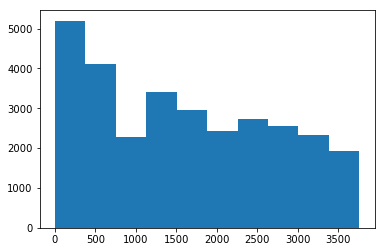

In [79]:
plt.hist(features.siteid)

(array([ 3137.,  2607.,  4302.,  2540.,  2732.,  3015.,  2639.,  2652.,
         3261.,  3035.]),
 array([    0. ,   252.8,   505.6,   758.4,  1011.2,  1264. ,  1516.8,
         1769.6,  2022.4,  2275.2,  2528. ]),
 <a list of 10 Patch objects>)

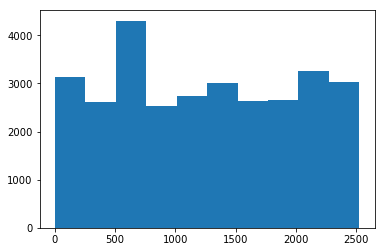

In [80]:
plt.hist(features.offerid)

(array([ 3137.,  2607.,  4302.,  2540.,  2732.,  3015.,  2639.,  2652.,
         3261.,  3035.]),
 array([    0. ,   252.8,   505.6,   758.4,  1011.2,  1264. ,  1516.8,
         1769.6,  2022.4,  2275.2,  2528. ]),
 <a list of 10 Patch objects>)

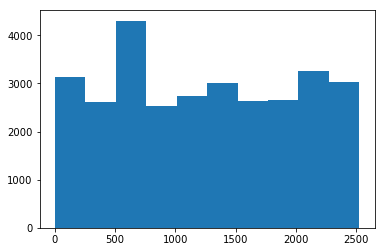

In [82]:
plt.hist(features.offerid)

(array([ 9494.,  8352.,  1602.,   860.,   585.,  1663.,  2768.,  2497.,
         1494.,   605.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

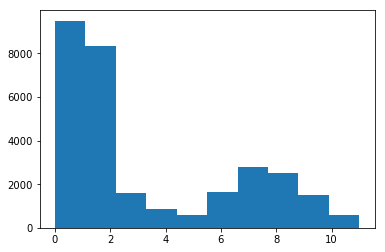

In [83]:
plt.hist(features.browserid)

(array([ 6977.,     0.,     0.,  9910.,     0.,     0.,  4526.,     0.,
            0.,  8507.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

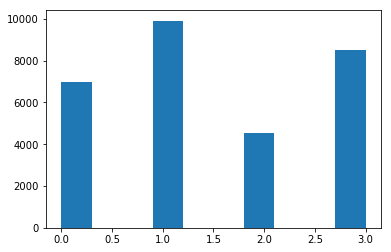

In [85]:
plt.hist(features.devid)

As we see that our columns are not skewed so no need to normalize our dataset so that looks fine.

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features we can see are already normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [24]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 22440 samples.
Testing set has 7480 samples.


In [25]:
# TODO: Import the supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10)

In [26]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
clf_probs=clf.predict_proba()

In [40]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,clf_probs[:, 1])
print score

0.761624046996


In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,clf_probs[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)


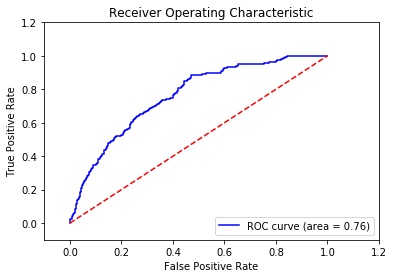

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='ROC curve (area = %0.2f)'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
from sklearn.grid_search import GridSearchCV
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf1 = GridSearchCV(clf, param_grid=param,cv=10)
# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = clf1.fit(X_train, y_train)
best_predictions = clf1.predict_proba(X_test)

In [88]:
score1=roc_auc_score(y_test,best_predictions[:, 1])
print score1

0.798343443


Now making a ROC curve for the optimized model and calculating the area under the curve.

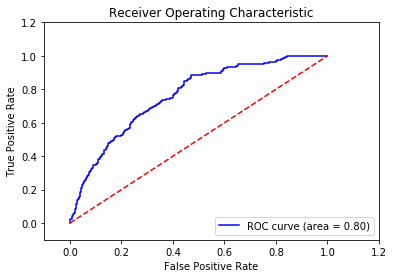

In [89]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='ROC curve (area = %0.2f)'% score1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()